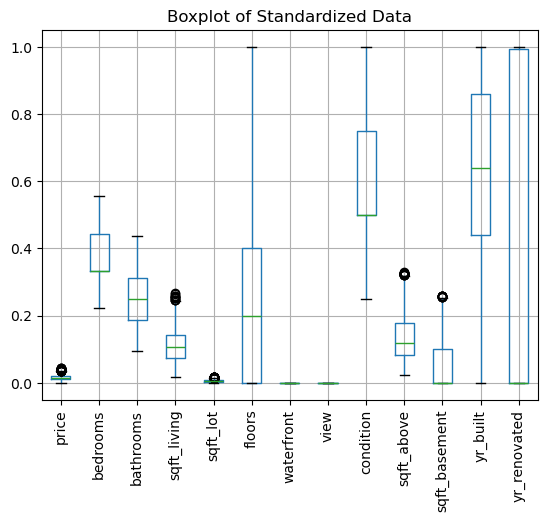

r2 score: 0.47032927557620297


In [70]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('data.csv')
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)
df_numeric = df.select_dtypes(include=['number'])

df['sqft_total'] = df['sqft_above'] + df['sqft_basement']

scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_numeric)
df_std = pd.DataFrame(df_std, columns=df_numeric.columns)

def iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = iqr(df_std, df_numeric.columns)
df_cleaned.boxplot()
plt.title('Boxplot of Standardized Data')
plt.xticks(rotation=90)
plt.show()

X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)


In [35]:
correlation_matrix = df.corr()['price']
print("Correlation with 'price':\n", correlation_matrix)

Correlation with 'price':
 price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64
